In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from pishield.propositional_constraints.clause import Clause
from pishield.propositional_constraints.clauses_group import ClausesGroup
from torch import nn

from experiment import Experiment
from shapes import HalfPlane, Circle

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


### Define the shapes

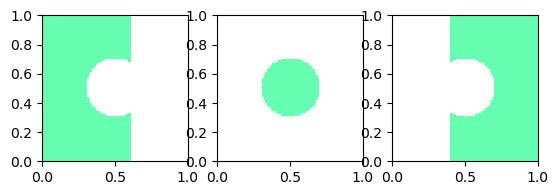

[<cloverd.propositional_constraints.constraint.Constraint object at 0x7f64828ddf10>, <cloverd.propositional_constraints.constraint.Constraint object at 0x7f64828dda50>] [<cloverd.propositional_constraints.constraint.Constraint object at 0x7f6496c19610>]
head 1 with old rules 1
head 1 with new rules 1
head n1 with old rules 2
head n1 with new rules 3
[<cloverd.propositional_constraints.constraint.Constraint object at 0x7f64828ef110>] [<cloverd.propositional_constraints.constraint.Constraint object at 0x7f64828ef050>]
head 2 with old rules 1
head 2 with new rules 1
head n2 with old rules 1
head n2 with new rules 2
[<cloverd.propositional_constraints.constraint.Constraint object at 0x7f64828ef710>] []
head n0 with old rules 1
head n0 with new rules 1


In [2]:
H0 = HalfPlane(1, 0, -0.6)
H1 = HalfPlane(-1, 0, 0.4) 
C = Circle(0.5, 0.5, 0.20)
shapes = [H0 & -C, C, H1 & -C]

fig, ax = plt.subplots(1, len(shapes))
for i, shape in enumerate(shapes):
  shape.plot(ax[i], full=True)
plt.show()


clauses = ClausesGroup([Clause('n0 n1'), Clause('n1 n2'), Clause('0 1 2')])
constraints1 = clauses.stratify('katz')
constraints2 = clauses.stratify('rev-katz')

cpu


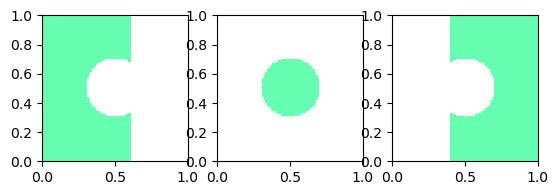

[<cloverd.propositional_constraints.constraint.Constraint object at 0x7f64822d5e50>, <cloverd.propositional_constraints.constraint.Constraint object at 0x7f64822d4e10>] [<cloverd.propositional_constraints.constraint.Constraint object at 0x7f6496c194d0>]
head 1 with old rules 1
head 1 with new rules 1
head n1 with old rules 2
head n1 with new rules 3
[<cloverd.propositional_constraints.constraint.Constraint object at 0x7f6497088050>] [<cloverd.propositional_constraints.constraint.Constraint object at 0x7f6497088d50>]
head 2 with old rules 1
head 2 with new rules 1
head n2 with old rules 1
head n2 with new rules 2
[<cloverd.propositional_constraints.constraint.Constraint object at 0x7f64822cc050>] []
head n0 with old rules 1
head n0 with new rules 1
NeuralNetwork(
  (linear): Sequential(
    (0): Linear(in_features=2, out_features=3, bias=True)
    (1): Tanh()
    (2): Linear(in_features=3, out_features=3, bias=True)
    (3): Sigmoid()
  )
)
[ 92265  95890 100000]


In [3]:
model = torch.load('./models/midcircle-unconstained-6.4456e-05-1652226558.pth')
init = torch.rand(100000, 2)
preds = model(init).detach()
coherency = clauses.coherent_with(preds)
print(np.sum(coherency, axis=0))

### Define the neural network

In [4]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear = nn.Sequential(
            nn.Linear(2, 4),
            nn.Tanh(),
            nn.Linear(4, 3),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.linear(x)
        return x

model = NeuralNetwork()
print(model)

NeuralNetwork(
  (linear): Sequential(
    (0): Linear(in_features=2, out_features=4, bias=True)
    (1): Tanh()
    (2): Linear(in_features=4, out_features=3, bias=True)
    (3): Sigmoid()
  )
)


### Train and test the model

In [ ]:
experiment = Experiment('midcircle', model, shapes, constraints1)
experiment.run(10, device='cpu')
experiment.save(dir='./models/')

Epoch 1, Ratio 1.0
-----------------------
Created slicer for 1 modules (atoms {0, 1, 2})
loss: 0.702584 [    0/ 2500]
Test Error: 
 Accuracy: 51.6%, 87.1%, 50.1%
 Avg loss: 0.000266 
Epoch 2, Ratio 1.0
-----------------------
Created slicer for 1 modules (atoms {0, 1, 2})
loss: 0.698260 [    0/ 2500]
Test Error: 
 Accuracy: 51.6%, 87.1%, 50.1%
 Avg loss: 0.000266 

Epoch 3, Ratio 1.0
-----------------------
Created slicer for 1 modules (atoms {0, 1, 2})
loss: 0.694315 [    0/ 2500]
Test Error: 
 Accuracy: 51.6%, 87.1%, 50.1%
 Avg loss: 0.000265 

Epoch 4, Ratio 1.0
-----------------------
Created slicer for 1 modules (atoms {0, 1, 2})
loss: 0.690724 [    0/ 2500]
Test Error: 
 Accuracy: 52.4%, 87.1%, 50.1%
 Avg loss: 0.000264 

Epoch 5, Ratio 1.0
-----------------------
Created slicer for 1 modules (atoms {0, 1, 2})
loss: 0.687433 [    0/ 2500]
Test Error: 
 Accuracy: 55.2%, 87.1%, 50.1%
 Avg loss: 0.000264 

Epoch 6, Ratio 1.0
-----------------------
Created slicer for 1 modules (ato